(gpu-vs-cpu)=   
# GPU vs. CPU

In this section, we will compare the performance of a CPU and a GPU when training a neural network on image data.

The **CPU (Central Processing Unit)** is a general-purpose processor found in all computers. It is designed to efficiently handle a wide range of tasks, including sequential logic, control flow, and input/output operations. CPUs typically have a small number of powerful cores (e.g., 4 to 12) that are optimized for tasks requiring flexibility and complex decision-making.

In contrast, the **GPU (Graphics Processing Unit)** is a specialized processor originally designed for rendering graphics. However, it turns out that the same features that make GPUs good at graphics — such as having hundreds or thousands of cores capable of doing the same operation in parallel — also make them ideal for tasks like training machine learning models.

Machine learning, especially deep learning, involves intensive mathematical computations — particularly linear algebra operations like matrix multiplication. These operations are highly parallelizable, which means they can be split into many small parts and computed simultaneously. GPUs are built to excel at exactly this kind of computation, which is why they often outperform CPUs by a significant margin when training large models or working with large datasets.

 

In [1]:
# Set this to False to disable GPU (CPU-only)
USE_GPU = True
if not USE_GPU:
    # Disable GPU by uninstalling tensorflow-metal
    !pip3 uninstall -y tensorflow-metal
else:
    # Make sure GPU plugin is installed
    !pip3 install -U tensorflow-metal
    
print("⚠️ Please RESTART the kernel after this cell before continuing.")



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


⚠️ Please RESTART the kernel after this cell before continuing.


In [2]:

import tensorflow as tf

print("GPUs visible:", tf.config.list_physical_devices('GPU'))

# This prints every operation's device placement
tf.debugging.set_log_device_placement(True)


GPUs visible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    # layers.Conv2D(128, 3, activation='relu'),
    # layers.MaxPooling2D(),
    # layers.Conv2D(64, 3, activation='relu'),
    # layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:42.500538: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-05-06 06:33:42.500565: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-05-06 06:33:42.500569: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
I0000 00:00:1746527622.500580  659761 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746527622.500601  659761 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-05-06 06:33:42.506926: I tensorflow/core/common_runtime/placer.cc:162] input: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.506938: I tensorflow/core/common_runtime/placer.cc:162] _EagerConst: (_EagerConst): /job:localhost/replic

In [5]:
import time

start = time.time()
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    #batch_size=512,
                    batch_size=64,
                    epochs=5,
                    verbose=2)
end = time.time()

print(f"\nTraining time: {end - start:.2f} seconds")


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:42.659591: I tensorflow/core/common_runtime/placer.cc:162] start: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.659597: I tensorflow/core/common_runtime/placer.cc:162] stop: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.659600: I tensorflow/core/common_runtime/placer.cc:162] step: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.659603: I tensorflow/core/common_runtime/placer.cc:162] RangeDataset: (RangeDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.659606: I tensorflow/core/common_runtime/placer.cc:162] handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.664946: I tensorflow/core/common_runtime/placer.cc:162] input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.664958: I tensorflow/core/common_runtime/placer.cc:162] MapDataset: (MapDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Epoch 1/5


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:42.717697: I tensorflow/core/common_runtime/placer.cc:162] input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.717707: I tensorflow/core/common_runtime/placer.cc:162] count: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.717718: I tensorflow/core/common_runtime/placer.cc:162] RepeatDataset: (RepeatDataset): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.717721: I tensorflow/core/common_runtime/placer.cc:162] handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.719911: I tensorflow/core/common_runtime/placer.cc:162] input__datasets_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.719921: I tensorflow/core/common_runtime/placer.cc:162] input__datasets_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:42.719925: I tensorflow/core/common_runtime/placer.cc:162] ZipDataset: (ZipDataset): /job:localhost/replic

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:42.875621: I tensorflow/core/common_runtime/placer.cc:162] resource_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.875637: I tensorflow/core/common_runtime/placer.cc:162] VarHandleOp: (VarHandleOp): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.880206: I tensorflow/core/common_runtime/placer.cc:162] resource_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.880213: I tensorflow/core/common_runtime/placer.cc:162] VarHandleOp: (VarHandleOp): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.906531: I tensorflow/core/common_runtime/placer.cc:162] resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.906543: I tensorflow/core/common_runtime/placer.cc:162] VarIsInitializedOp: (VarIsInitializedOp): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.906546: I tensorflow/core/common_runtime/placer.cc:162] is__initialized_RetVal: (_

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0


input: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
_EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
x: (_DeviceArg): /job:localhost/replica:0/task:0/device:GPU:0
Cast: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
y_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
_EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
x: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
y: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
FloorMod: (FloorMod): /job:localhost/replica:0/task:0/device:CPU:0
z_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
x: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
Cast: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
y_RetVal: (_DeviceRetval): /job:localhost/rep

Executing op __inference_initialize_variables_912 in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:42.918302: I tensorflow/core/common_runtime/placer.cc:162] resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.918315: I tensorflow/core/common_runtime/placer.cc:162] VarIsInitializedOp: (VarIsInitializedOp): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.918318: I tensorflow/core/common_runtime/placer.cc:162] is__initialized_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.920317: I tensorflow/core/common_runtime/placer.cc:162] values_0: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.920324: I tensorflow/core/common_runtime/placer.cc:162] values_1: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.920326: I tensorflow/core/common_runtime/placer.cc:162] values_2: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:42.920328: I tensorflow/core/common_runtime/placer.cc:162] values_3: (_Arg): /job:localhost/replica:0/task:0

ack): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_1_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_2_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_3_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_4_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_5_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_6_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_7_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_8_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_9_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
assignvariableop_10_resource: (_Arg): /job:localhost/replica

Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:43.409992: I tensorflow/core/common_runtime/placer.cc:162] optional: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:43.410008: I tensorflow/core/common_runtime/placer.cc:162] OptionalHasValue: (OptionalHasValue): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:43.410012: I tensorflow/core/common_runtime/placer.cc:162] has__value_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:43.413036: I tensorflow/core/common_runtime/placer.cc:162] optional: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:43.413046: I tensorflow/core/common_runtime/placer.cc:162] OptionalGetValue: (OptionalGetValue): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:43.413049: I tensorflow/core/common_runtime/placer.cc:162] components_0_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-06 06:33:43.413052: I tensorflow/core/common_runtime/placer.cc:162] components_1_RetVal: (_R

Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


GPU:0
StatefulPartitionedCall/adam/Const_3: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Const_4: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Cast_9/x: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Cast_10/x: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/sub_4/x: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/sub_5/x: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Const_5: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Const_6: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Const_8: (Const): /job:localhost/replica:0/task:0/device:GPU:0
StatefulPartitionedCall/adam/Cast_15/x: (Const): /job:localhost/replica

Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:54.698220: I tensorflow/core/common_runtime/placer.cc:162] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:54.698234: I tensorflow/core/common_runtime/placer.cc:162] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:54.698237: I tensorflow/core/common_runtime/placer.cc:162] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:54.698241: I tensorflow/core/common_runtime/placer.cc:162] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:54.698243: I tensorflow/core/common_runtime/placer.cc:162] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:54.698247: I tensorflow/core/common_runtime/placer.cc:162] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:54.698249: I tensorflow/core/common_runtime/placer.cc:162] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


844/844 - 13s - 15ms/step - accuracy: 0.9334 - loss: 0.2259 - val_accuracy: 0.9793 - val_loss: 0.0833


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Epoch 2/5


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:33:55.595246: I tensorflow/core/common_runtime/placer.cc:162] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:55.595261: I tensorflow/core/common_runtime/placer.cc:162] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:55.595266: I tensorflow/core/common_runtime/placer.cc:162] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:55.595269: I tensorflow/core/common_runtime/placer.cc:162] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:55.595272: I tensorflow/core/common_runtime/placer.cc:162] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:55.595274: I tensorflow/core/common_runtime/placer.cc:162] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:33:55.595277: I tensorflow/core/common_runtime/placer.cc:162] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-

Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:34:05.820626: I tensorflow/core/common_runtime/placer.cc:162] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:05.820640: I tensorflow/core/common_runtime/placer.cc:162] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:05.820643: I tensorflow/core/common_runtime/placer.cc:162] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:05.820647: I tensorflow/core/common_runtime/placer.cc:162] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:05.820649: I tensorflow/core/common_runtime/placer.cc:162] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:05.820652: I tensorflow/core/common_runtime/placer.cc:162] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:05.820655: I tensorflow/core/common_runtime/placer.cc:162] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_5029 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


844/844 - 11s - 13ms/step - accuracy: 0.9734 - loss: 0.0846 - val_accuracy: 0.9782 - val_loss: 0.0788


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Epoch 3/5


Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


2025-05-06 06:34:06.560449: I tensorflow/core/common_runtime/placer.cc:162] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:06.560463: I tensorflow/core/common_runtime/placer.cc:162] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:06.560468: I tensorflow/core/common_runtime/placer.cc:162] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:06.560471: I tensorflow/core/common_runtime/placer.cc:162] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:06.560474: I tensorflow/core/common_runtime/placer.cc:162] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:06.560477: I tensorflow/core/common_runtime/placer.cc:162] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-05-06 06:34:06.560479: I tensorflow/core/common_runtime/placer.cc:162] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2025-

Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_multi_step_on_iterator_1401 in device /job:localhost/replica:0/task:0/device:GPU:0


KeyboardInterrupt: 

Version 1 (with a larger CNN and batch size), for 5 Epochs: 
* Training on the CPU: 61.05 seconds
* Training on the GPU: 15.04 seconds

Version 2 (with a smaller CNN and batch size), for 5 Epochs: 
* Training on the CPU: 18.71 seconds 
* Training on the GPU: 57.40 seconds

The conclusion is that the GPU is *not always* faster than the CPU.  There is a significant amount of overhead in transferring data to and from the GPU, and for smaller models or smaller batch sizes, this overhead can outweigh the benefits of parallel processing.

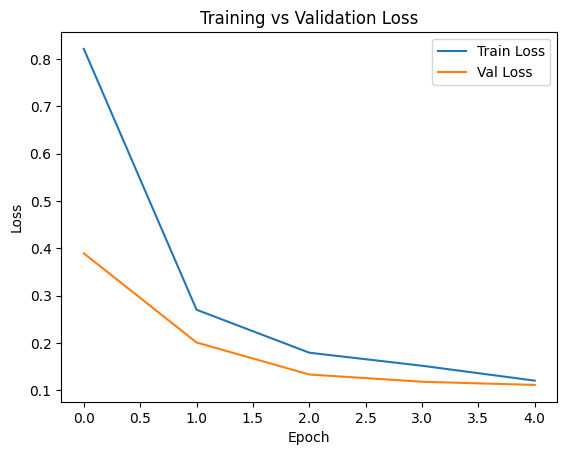

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
